# 没有训练强化的演示框架部分

#### 简洁版

In [2]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.io
from matplotlib.gridspec import GridSpec
import math

from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor

import sys
import os

# 将 src 目录添加到模块搜索路径
sys.path.append(os.path.abspath('src'))

# 导入 IEMEnv 类
from src.envs.iseec_lx_v4_mdp_plot import IEMEnv

# 设置日志保存路径和格式
tmp_path = "logs/sb3_log/"
new_logger = configure(
    tmp_path, 
    ["stdout",     # 终端输出
     "csv",        # CSV文件
     "tensorboard", # Tensorboard格式
     "json"        # JSON格式
    ]
)


env = IEMEnv(reward_type="PB_ste")

Logging to logs/sb3_log/
[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031
 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


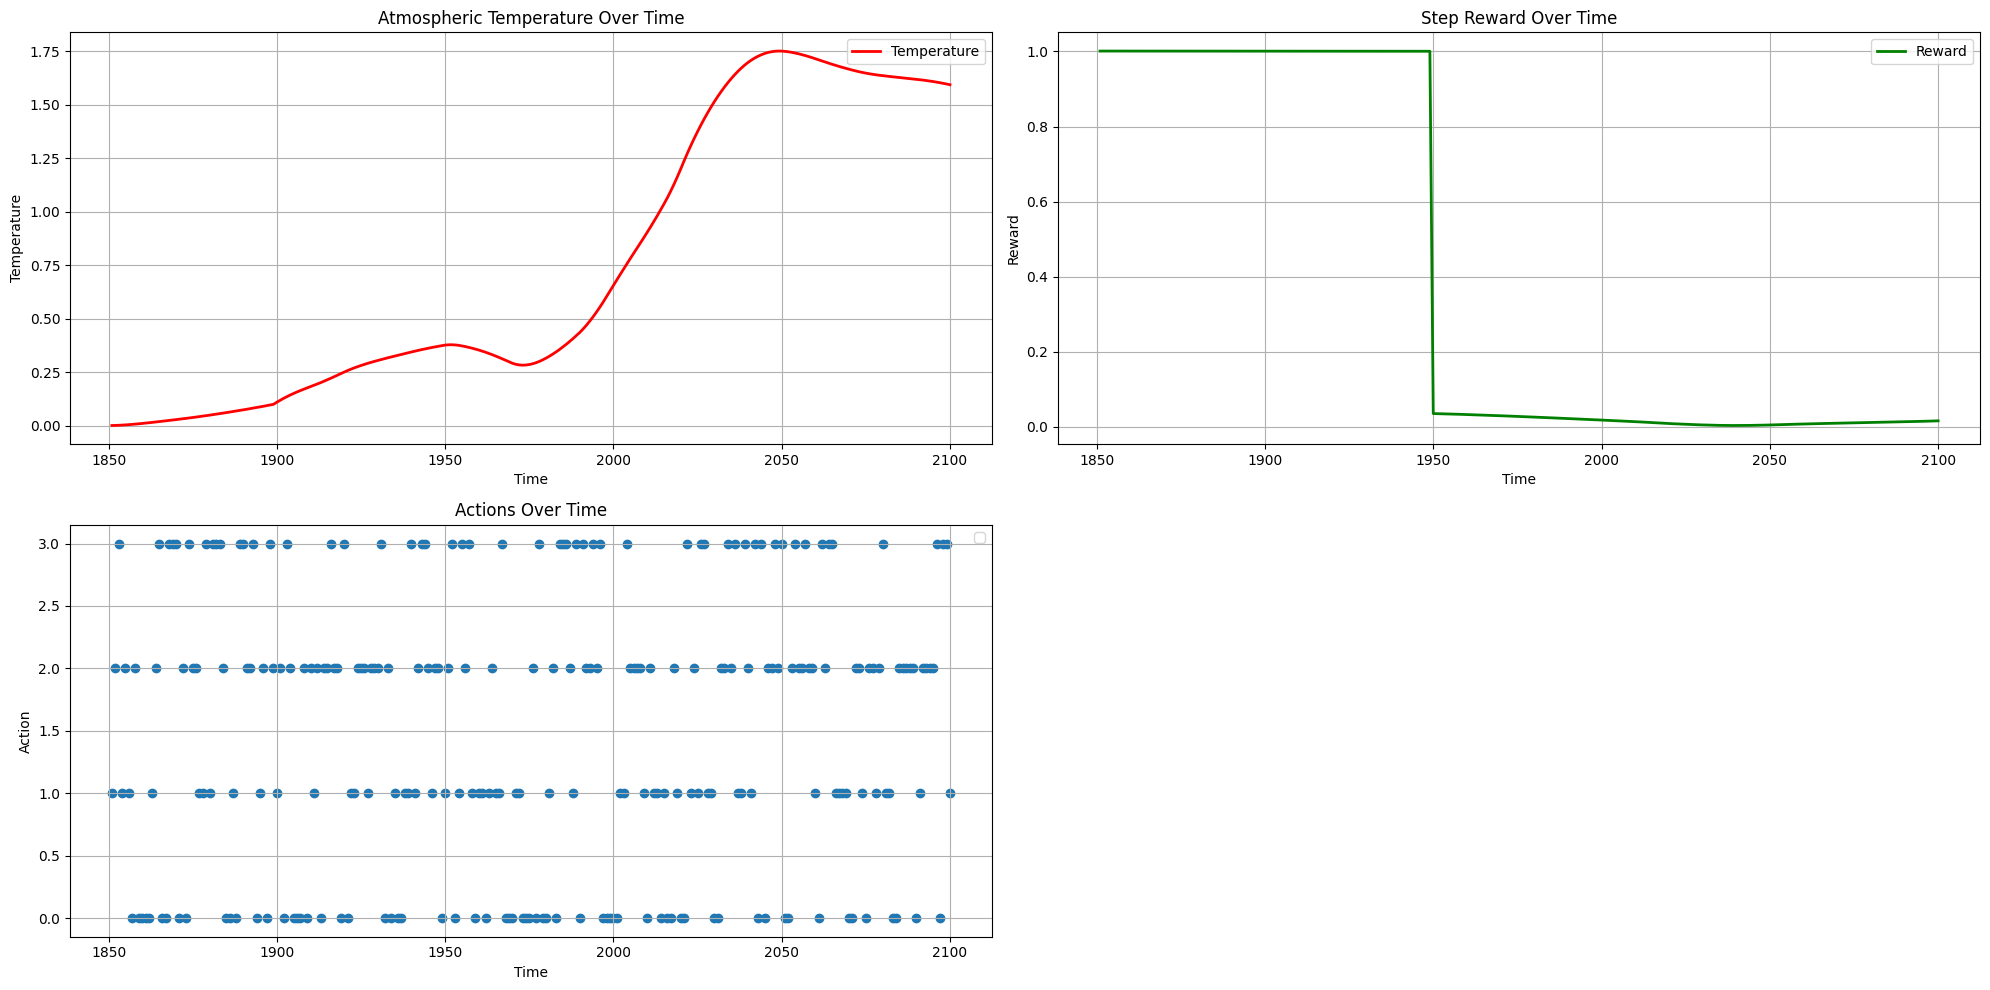

KeyboardInterrupt: 

In [3]:
# 关闭交互模式
plt.ioff()

episodes = 30
max_steps = 251

for ep in range(episodes):
    obs = env.reset()
    done = False
    
    for i in range(max_steps):
        action = env.action_space.sample()
        # action = np.array([0, 0])
        obs, reward, done, _, info = env.step(action)
        
        if i % 50 == 0:
            # 清除之前的图形
            plt.close('all')
            # 绘制新图形
            env.render()
            # 增加暂停时间到3秒
            plt.pause(3)
        
        reward += reward
        
    print(f"Episode {ep} finished with reward")

# 恢复交互模式
plt.ion()

参照这个可视化

# RL 训练部分的-sb3 集成

In [7]:

# from stable_baselines3 import DQN
from stable_baselines3 import PPO  

# 定义模型
model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1,
    tensorboard_log="./logs/tensorboard_logs",
    )

model.set_logger(new_logger)

model.learn(
    total_timesteps=int(2e4),
    tb_log_name="iseec_v4_PPO_Net256_2e4",
            )



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 250      |
|    ep_rew_mean     | 101      |
| time/              |          |
|    fps             | 248      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 250         |
|    ep_rew_mean          | 101         |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013976825 |
|    clip_fraction        | 0.0146      |
|    clip_range           | 0.2         |
|    entropy_loss  

In [9]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO

env_monitor = Monitor(env, './logs/monitor_logs/monitor2') # 可以考虑使用递增写法来更换位置
model = PPO("MlpPolicy", env_monitor, verbose=1)
model.learn(
    total_timesteps=int(2e4),
    tb_log_name="iseec_v4_PPO_Net256_2e4_monitor",
            )


Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 250      |
|    ep_rew_mean     | 101      |
| time/              |          |
|    fps             | 289      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 250         |
|    ep_rew_mean          | 101         |
| time/                   |             |
|    fps                  | 279         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016097955 |
|    clip_fraction        | 0.0846      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_vari

根据 monitor 绘制结果

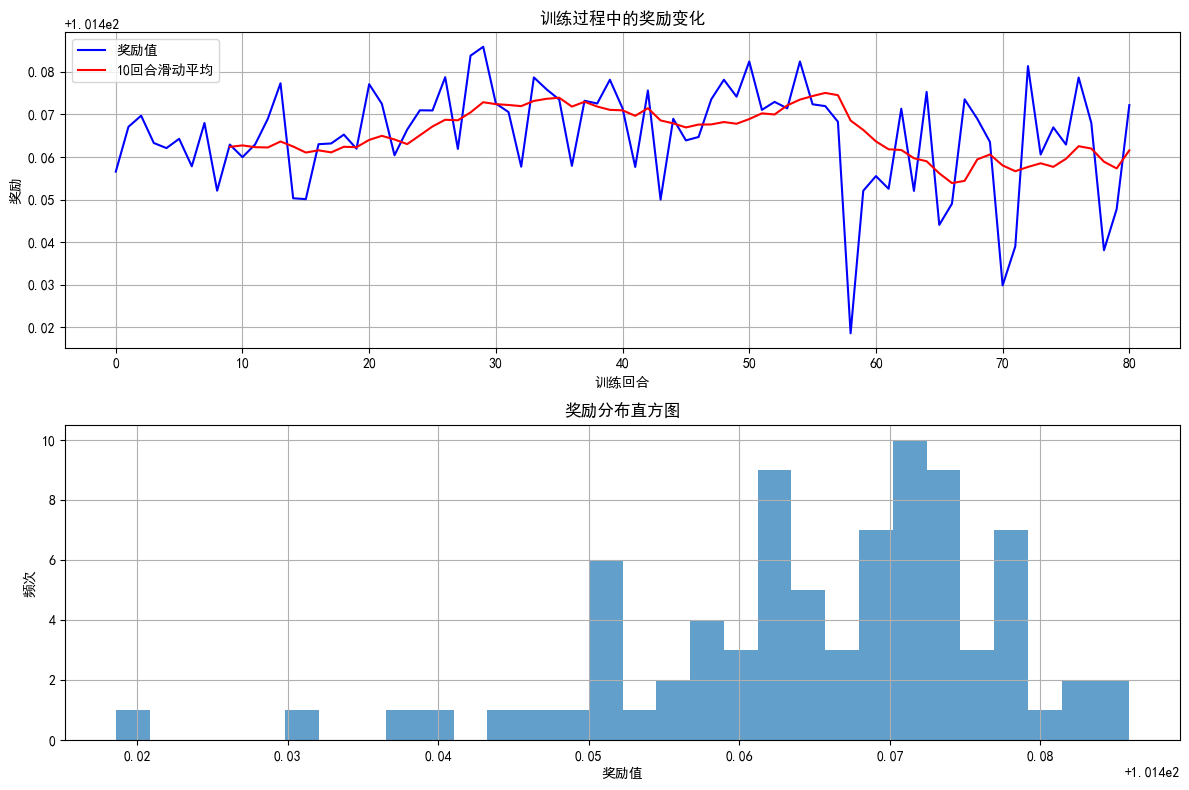

平均奖励: 101.47
奖励标准差: 0.01
最大奖励: 101.49
最小奖励: 101.42


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 读取monitor文件
df = pd.read_csv('logs/monitor_logs/monitor.monitor.csv', skiprows=1)  # 跳过第一行元数据

# 创建图形
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(df['r'], 'b-', label='奖励值')
plt.xlabel('训练回合')
plt.ylabel('奖励')
plt.title('训练过程中的奖励变化')
plt.grid(True)
plt.legend()

# 计算滑动平均
window_size = 10
rolling_mean = df['r'].rolling(window=window_size).mean()
plt.plot(rolling_mean, 'r-', label=f'{window_size}回合滑动平均')
plt.legend()

# 显示统计信息
plt.subplot(2, 1, 2)
plt.hist(df['r'], bins=30, alpha=0.7)
plt.xlabel('奖励值')
plt.ylabel('频次')
plt.title('奖励分布直方图')
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印一些统计信息
print(f"平均奖励: {df['r'].mean():.2f}")
print(f"奖励标准差: {df['r'].std():.2f}")
print(f"最大奖励: {df['r'].max():.2f}")
print(f"最小奖励: {df['r'].min():.2f}")

In [ ]:
# 保存模型
# 保存在 model 里
model.save("model/iseec_v4_PPO_Net256_2e4")
del model

### 评估模型训练结果

> 利用 evaulate policy 函数评估


In [5]:
model = PPO.load("model/iseec_v4_PPO_Net256_2e4", env=env)
print(model.env)

NameError: name 'PPO' is not defined

# 加载训练好的 RL 模型

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(
    model, 
    model.get_env(), 
    deterministic=True,
    render=True,
    n_eval_episodes=10)

In [ ]:
print(mean_reward)
print(std_reward)

In [4]:
# 关闭交互模式
plt.ioff()

episodes = 30
max_steps = 251

for ep in range(episodes):
    obs, _ = env.reset()
    done = False
    
    for i in range(max_steps):
        action, _ = model.predict(obs, deterministic=True)
        # action = np.array([0, 0])
        obs, reward, done, _, info = env.step(action)
        
        if i % 50 == 0:
            # 清除之前的图形
            plt.close('all')
            # 绘制新图形
            env.render()
            # 增加暂停时间到3秒
            plt.pause(3)
        
        reward += reward
        
    print(f"Episode {ep} finished with reward")

# 恢复交互模式
plt.ion()

NameError: name 'model' is not defined

# 保存运行结果绘制的
注意：
- 可能只能保存某次的运行结果
- 需要保存多次运行结果，需要多次运行

## 绘制运行结果

> 和师姐讨论的绘制结果部分

## 不同格式读取

In [ ]:
# 1. CSV格式 - 用于数据分析
log_path = "logs/sb3_log/progress.csv"
import pandas as pd
data = pd.read_csv(log_path)

# 2. Tensorboard格式 - 用于可视化
# 终端运行: tensorboard --logdir logs/sb3_log/

# 3. JSON格式 - 用于数据处理
log_path = "logs/sb3_log/progress.json"
import json
with open(log_path, 'r') as f:
    data = json.load(f)

# RL 训练部分的-sb3 手动 

In [ ]:

import gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

# 创建环境
env = gym.make('CartPole-v1')

# 创建PPO模型
model = PPO("MlpPolicy", env, verbose=1)

# 用于记录每集的奖励
episode_rewards = []

# 训练模型并手动记录奖励
total_timesteps = 10
timesteps_per_episode = 200  # 每集最多200步
current_timesteps = 0


# 开始训练过程
while current_timesteps < total_timesteps:
    obs, _ = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action, _states = model.predict(obs, deterministic=True)  # 根据当前模型预测动作
        obs, reward, done, _, info = env.step(action)  # 执行动作
        episode_reward += reward
        
        # 执行模型的优化（训练）
        model.learn(total_timesteps=1, reset_num_timesteps=False)  # 每一步执行一次训练

        current_timesteps += 1
        if current_timesteps >= total_timesteps:
            break
    
    episode_rewards.append(episode_reward)

# 单独创建一个画布(注意和 render 之间的矛盾)
plt.figure()

# 绘制奖励曲线
plt.plot(episode_rewards)
plt.title("Training Rewards")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.show()
